In [1]:
import pandas as pd
df = pd.read_excel('query_result_2023-01-09T10_39_06.854164Z.xlsx')
df.head()

C:\Users\ismail.awad_maxab\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,RETAILER_ID,CREATED_AT,TOTAL_PRICE,CHANNEL,NAME_AR,ORDER_ID
0,104,2022-05-26 22:36:46,2320.0,telesales,القاهرة الكبري,2448646
1,104,2022-07-04 12:01:33,3360.0,telesales,القاهرة الكبري,2654523
2,137,2022-06-06 10:47:17,2475.0,telesales,القاهرة الكبري,2501042
3,137,2022-06-27 16:07:16,160.5,telesales,القاهرة الكبري,2616244
4,137,2022-06-27 16:07:16,91.5,telesales,القاهرة الكبري,2616244


In [2]:
df.columns = [x.lower() for x in df.columns]

df['name_ar'].fillna('No Region',inplace = True)

mapping = {"القاهرة الكبري":"Cairo",
          "غرب الدلتا": "West Delta",
          "شرق الدلتا": "East Delta",
          "وجه قبلي" : "UE",
          "الاسكندرية": "Alex"}

df['name_ar'].replace(mapping,inplace = True)

df.name_ar.value_counts()


Cairo         333879
West Delta    121461
East Delta     98145
UE             90571
Alex           69081
No Region       5809
Name: name_ar, dtype: int64

In [3]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['retailer_id'] = df['retailer_id'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718946 entries, 0 to 718945
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   retailer_id  718946 non-null  int32         
 1   created_at   718946 non-null  datetime64[ns]
 2   total_price  718946 non-null  float64       
 3   channel      718946 non-null  object        
 4   name_ar      718946 non-null  object        
 5   order_id     718946 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 30.2+ MB


In [4]:
from datetime import datetime as dt
def get_month(x):
    return dt(x.year, x.month, 1)
  
# Create the invoicemonth period column

df['OrderMonth'] = df['created_at'].apply(get_month)
df.head()

,retailer_id,created_at,total_price,channel,name_ar,order_id,OrderMonth
0,104,2022-05-26 22:36:46,2320.0,telesales,Cairo,2448646,2022-05-01
1,104,2022-07-04 12:01:33,3360.0,telesales,Cairo,2654523,2022-07-01
2,137,2022-06-06 10:47:17,2475.0,telesales,Cairo,2501042,2022-06-01
3,137,2022-06-27 16:07:16,160.5,telesales,Cairo,2616244,2022-06-01
4,137,2022-06-27 16:07:16,91.5,telesales,Cairo,2616244,2022-06-01


In [5]:
grouping = df.groupby('retailer_id')['OrderMonth']
df['CohortMonth'] = grouping.transform('min')
df['first_order_month'] = df['CohortMonth'].dt.month
df['months'] = df['created_at'].dt.month
df['last_month_of_the_year'] = 12
df['working_months'] = df.groupby('retailer_id')['months'].transform('nunique')
df['consistency'] = df['working_months'] / ( df['last_month_of_the_year'] - df['first_order_month']  + 1 )
df.head(50)

,retailer_id,created_at,total_price,channel,name_ar,order_id,OrderMonth,CohortMonth,first_order_month,months,last_month_of_the_year,working_months,consistency
0,104,2022-05-26 22:36:46,2320.000000,telesales,Cairo,2448646,2022-05-01,2022-05-01,5,5,12,2,0.250000
1,104,2022-07-04 12:01:33,3360.000000,telesales,Cairo,2654523,2022-07-01,2022-05-01,5,7,12,2,0.250000
2,137,2022-06-06 10:47:17,2475.000000,telesales,Cairo,2501042,2022-06-01,2022-06-01,6,6,12,7,1.000000
3,137,2022-06-27 16:07:16,160.500000,telesales,Cairo,2616244,2022-06-01,2022-06-01,6,6,12,7,1.000000
4,137,2022-06-27 16:07:16,91.500000,telesales,Cairo,2616244,2022-06-01,2022-06-01,6,6,12,7,1.000000
5,137,2022-06-27 16:07:16,291.000000,telesales,Cairo,2616244,2022-06-01,2022-06-01,6,6,12,7,1.000000
6,137,2022-06-27 16:07:16,3397.981010,telesales,Cairo,2616244,2022-06-01,2022-06-01,6,6,12,7,1.000000
7,137,2022-07-23 14:46:22,1872.000000,telesales,Cairo,2740950,2022-07-01,2022-06-01,6,7,12,7,1.000000
8,137,2022-08-03 16:26:30,862.000000,telesales,Cairo,2805677,2022-08-01,2022-06-01,6,8,12,7,1.000000
9,137,2022-08-31 15:11:56,2932.300000,telesales,Cairo,2964069,2022-08-01,2022-06-01,6,8,12,7,1.000000


## Splitting the retailers into consistent and non-consistent
#### As this will be relevant to further analyses later on

In [6]:
df_consistent = df.loc[df['consistency'] == 1 ]
df_inconsistent = df.loc[df['consistency'] != 1]
df_inconsistent.head()

,retailer_id,created_at,total_price,channel,name_ar,order_id,OrderMonth,CohortMonth,first_order_month,months,last_month_of_the_year,working_months,consistency
0,104,2022-05-26 22:36:46,2320.00,telesales,Cairo,2448646,2022-05-01,2022-05-01,5,5,12,2,0.250
1,104,2022-07-04 12:01:33,3360.00,telesales,Cairo,2654523,2022-07-01,2022-05-01,5,7,12,2,0.250
23,142,2022-05-28 17:44:42,229.75,telesales,Cairo,2454736,2022-05-01,2022-05-01,5,5,12,3,0.375
24,142,2022-06-12 22:30:43,401.00,admin,Cairo,2538033,2022-06-01,2022-05-01,5,6,12,3,0.375
25,142,2022-07-19 20:33:13,310.00,telesales,Cairo,2723453,2022-07-01,2022-05-01,5,7,12,3,0.375


## Getting the cohorts for consistent df

In [7]:
# This function gets us the integer value of year and month

def get_date_int(df, column):
   year = df[column].dt.year
   month = df[column].dt.month
   return year, month
  
# Get the integers for the date parts from the 'InvoiceMonth' column

invoice_year, invoice_month = get_date_int(df, 'created_at')

# Get the integers for date parts from the 'Cohortmonth' column

cohort_year, cohort_month = get_date_int(df, 'CohortMonth')

# Calculate difference in years

years_diff = invoice_year - cohort_year

# Calculate difference in months

months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values
df['CohortIndex'] = years_diff * 12 + months_diff + 1

## Correcting the cohort index to not include poeople who stopped the buying consistently and label thim back to the latest cohort they used to actively buy
#### pay colse attention to retailers whom ids are ( 227 , 331 )

In [8]:
inc_count = lambda x: x.eq(x.shift()+1).cumsum().add(1)
df['CohortIndexCorrected'] = df['CohortIndexCorrected'] = df.groupby('retailer_id')['CohortIndex'].transform(inc_count)

In [9]:
df[['retailer_id','OrderMonth','CohortIndex','CohortIndexCorrected']].head(50)

,retailer_id,OrderMonth,CohortIndex,CohortIndexCorrected
0,104,2022-05-01,1,1
1,104,2022-07-01,3,1
2,137,2022-06-01,1,1
3,137,2022-06-01,1,1
4,137,2022-06-01,1,1
5,137,2022-06-01,1,1
6,137,2022-06-01,1,1
7,137,2022-07-01,2,2
8,137,2022-08-01,3,3
9,137,2022-08-01,3,3


## Raw Data ready to plot

In [10]:
grouping = df.groupby(['CohortMonth', 'CohortIndexCorrected'])

# Count the number of unique values per Customer ID

cohort_data = grouping['retailer_id'].apply(pd.Series.nunique).reset_index()

# Create a pivot

cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndexCorrected', values='retailer_id')

# Select the first column and store it to cohort_sizes

cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows

retention = cohort_counts.divide(cohort_sizes, axis=0)*100
retention

CohortIndexCorrected,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2022-01-01,100.0,75.378242,62.806196,52.125360,45.028818,38.544669,32.636888,27.485591,22.010086,18.984150,12.481988,11.833573
2022-02-01,100.0,76.691056,62.042706,52.112886,44.363148,37.240555,31.133343,24.921607,20.591310,13.901747,12.975959,NaN
2022-03-01,100.0,68.944699,54.684859,45.629075,37.985994,31.695243,25.561459,21.190534,13.583675,12.545279,NaN,NaN
2022-04-01,100.0,70.029951,55.540996,45.263946,37.345563,29.745414,24.466492,16.117559,14.619993,NaN,NaN,NaN
2022-05-01,100.0,69.138756,53.073243,42.528524,34.026500,25.984542,16.617593,14.924549,NaN,NaN,NaN,NaN
2022-06-01,100.0,69.796120,54.554423,42.897073,34.413022,22.114436,19.269977,NaN,NaN,NaN,NaN,NaN
2022-07-01,100.0,68.339768,50.335298,37.695590,25.116846,21.479374,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,100.0,64.486844,45.006924,29.204493,24.588398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01,100.0,64.453273,42.811199,34.165721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot the numbers

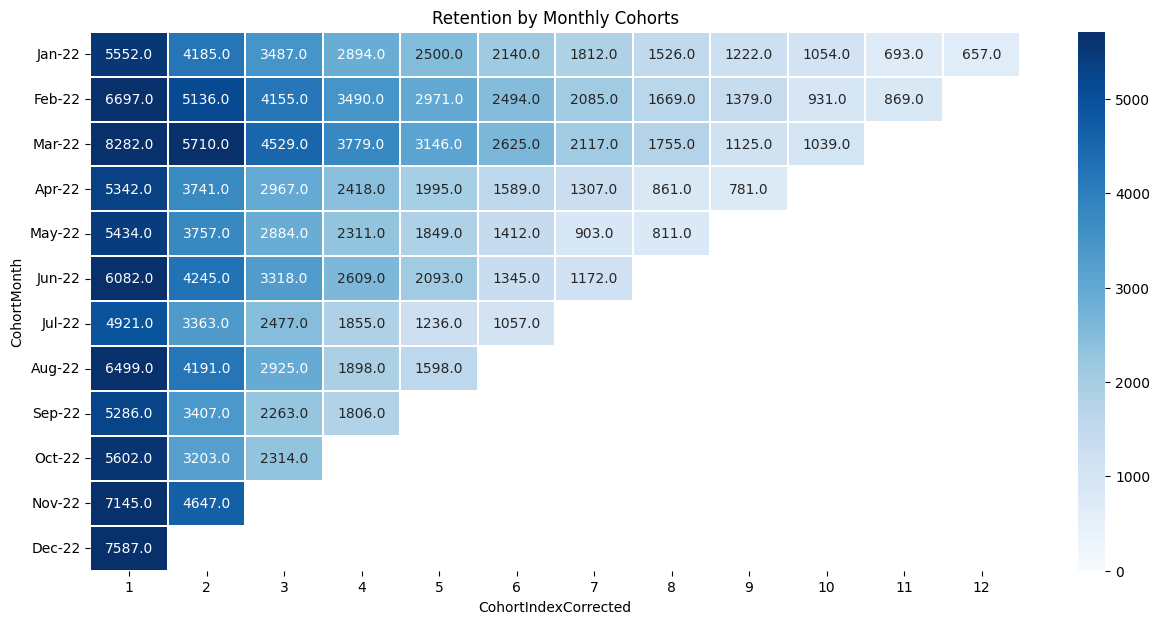

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create list of month names for visualisation

month_list = retention.reset_index()['CohortMonth']

def get_month_name(x):
   return dt.strftime(x, '%b-%y')
  
month_list = month_list.apply(get_month_name)

# Initialize inches plot figure

plt.figure(figsize=(15,7))

# Add a title

plt.title('Retention by Monthly Cohorts')

# Create the heatmap

sns.heatmap(data=cohort_counts,
annot = True,
cmap = "Blues",
vmin = 0.0,
vmax = list(cohort_counts.max().sort_values(ascending = False))[1]+3,
fmt = '.1f',
linewidth = 0.3,
yticklabels=month_list)
plt.show();

## Plot the percentages

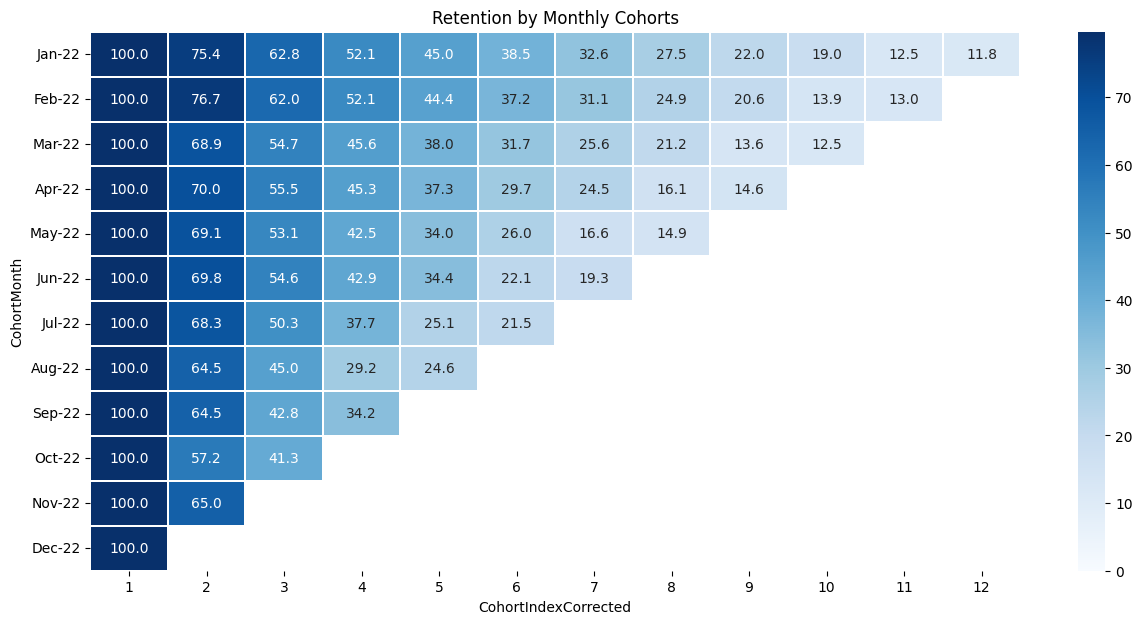

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create list of month names for visualisation

month_list = retention.reset_index()['CohortMonth']

def get_month_name(x):
   return dt.strftime(x, '%b-%y')
  
month_list = month_list.apply(get_month_name)

# Initialize inches plot figure

plt.figure(figsize=(15,7))

# Add a title

plt.title('Retention by Monthly Cohorts')

# Create the heatmap

sns.heatmap(data=retention,
annot = True,
cmap = "Blues",
vmin = 0.0,
vmax = list(retention.max().sort_values(ascending = False))[1]+3,
fmt = '.1f',
linewidth = 0.3,
yticklabels=month_list)
plt.show();

## Making a retention plot for all regions

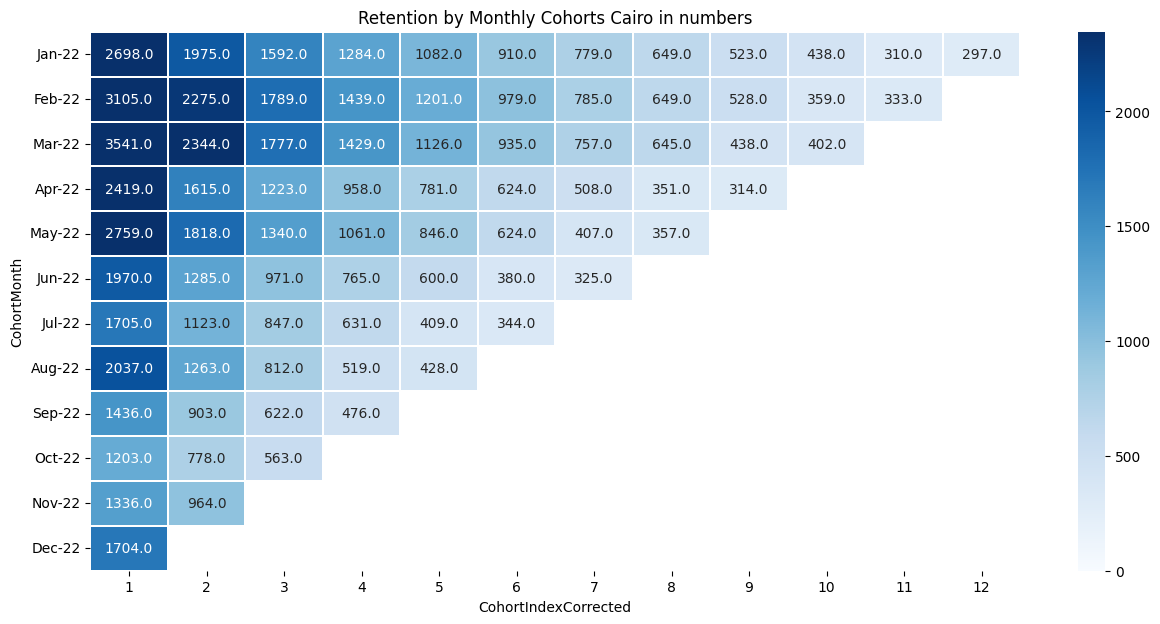

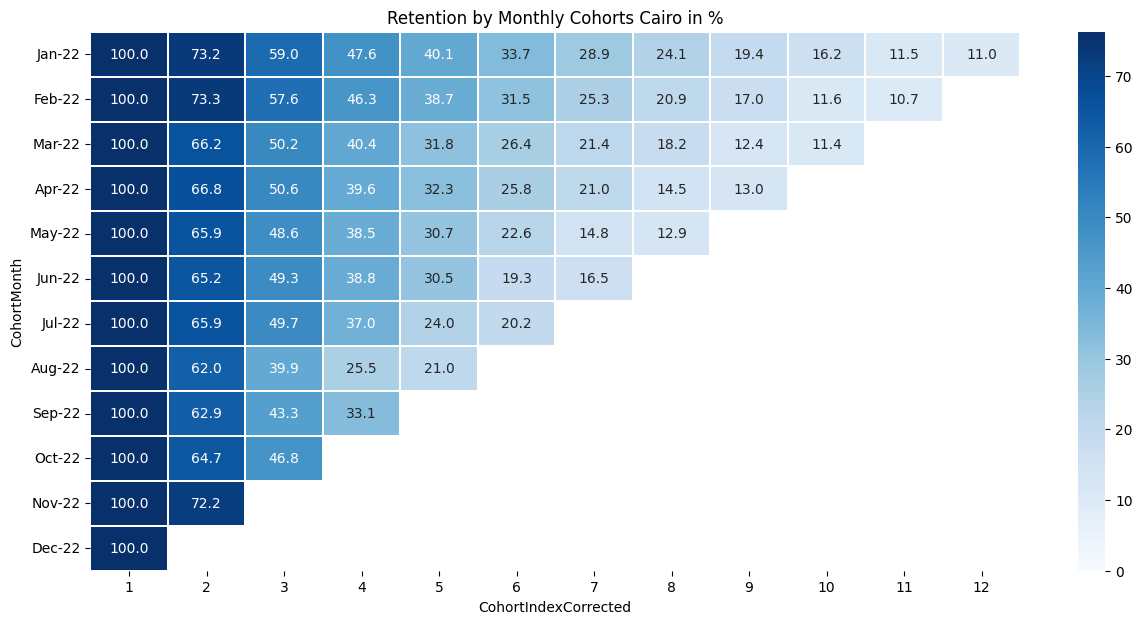

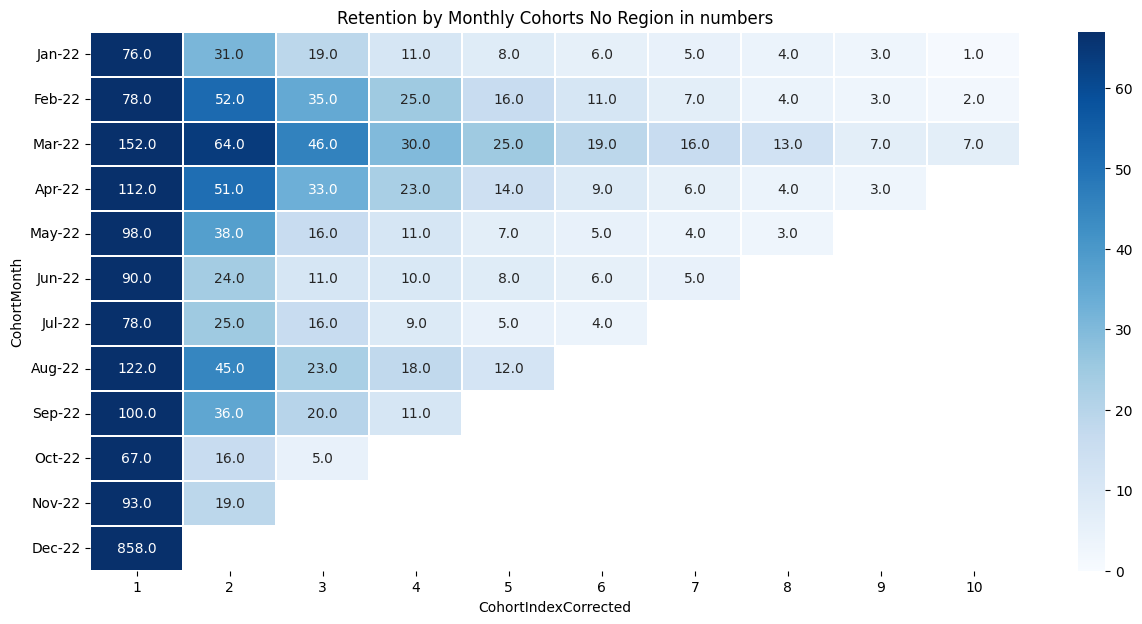

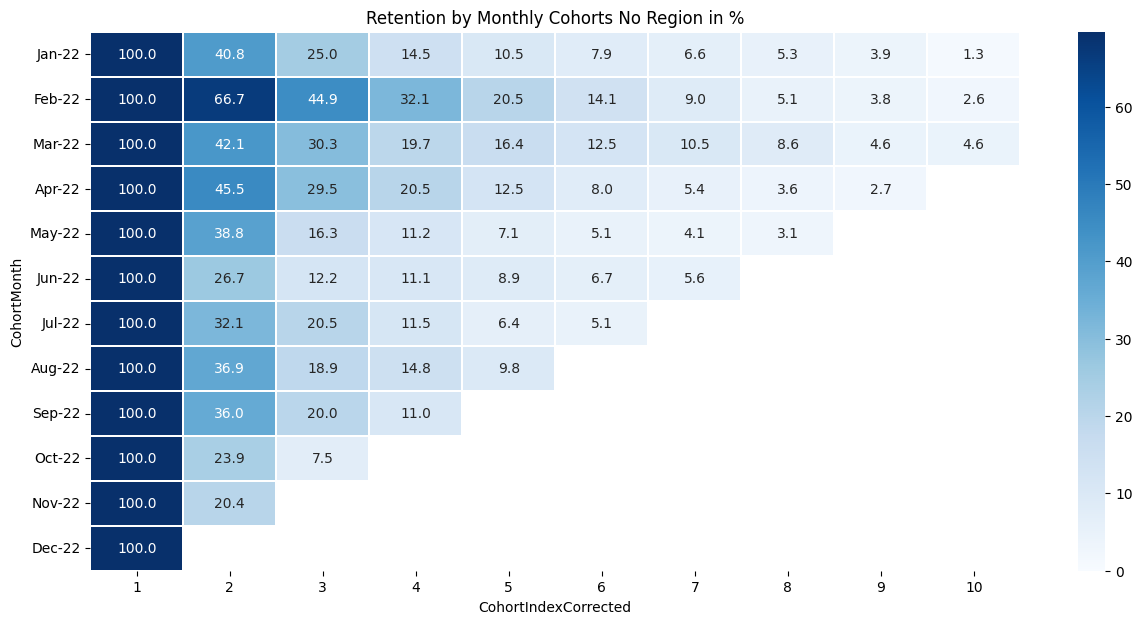

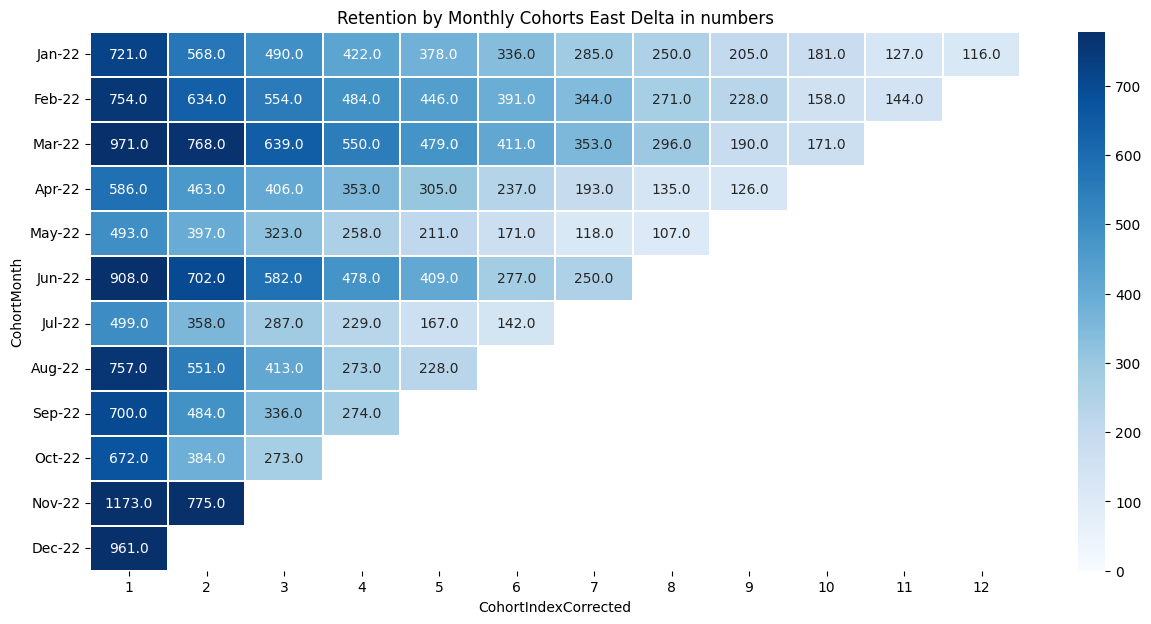

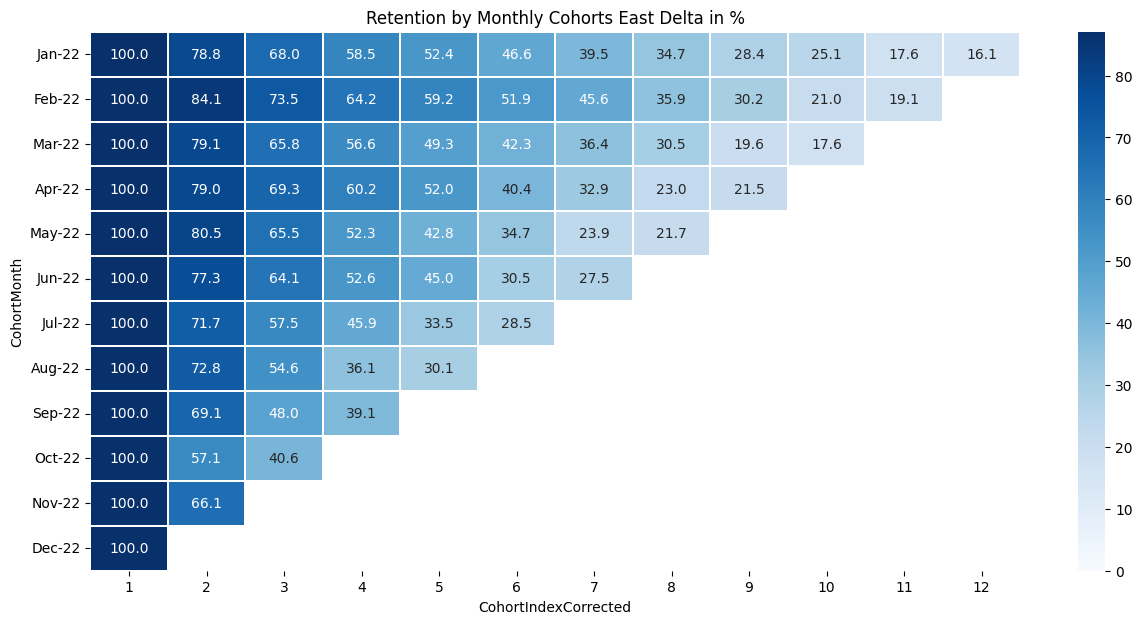

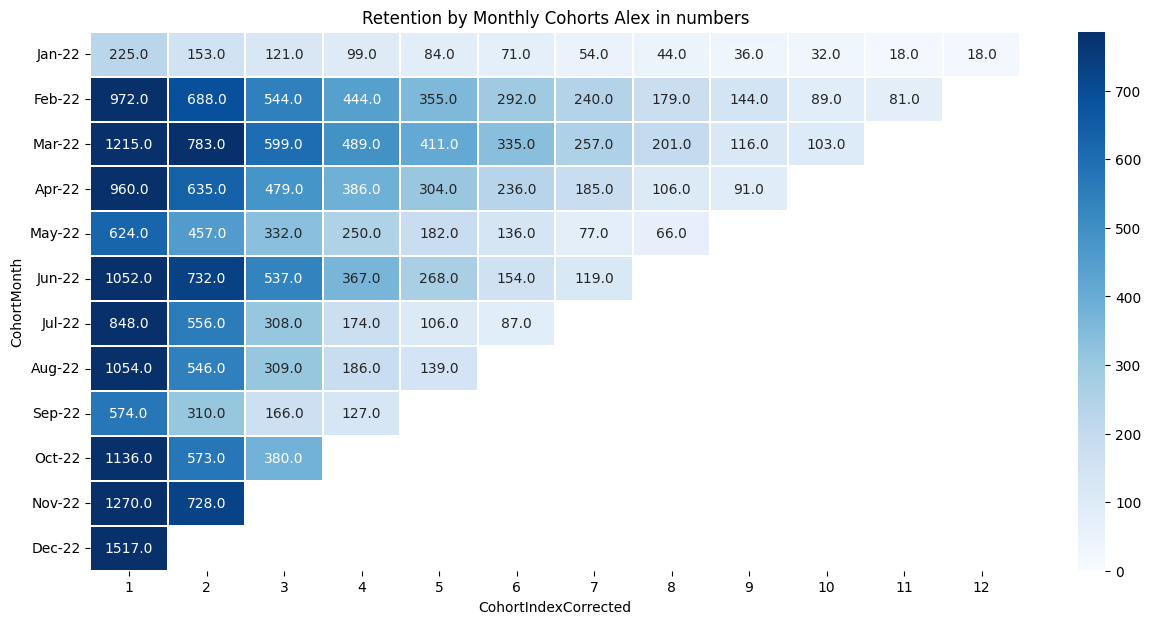

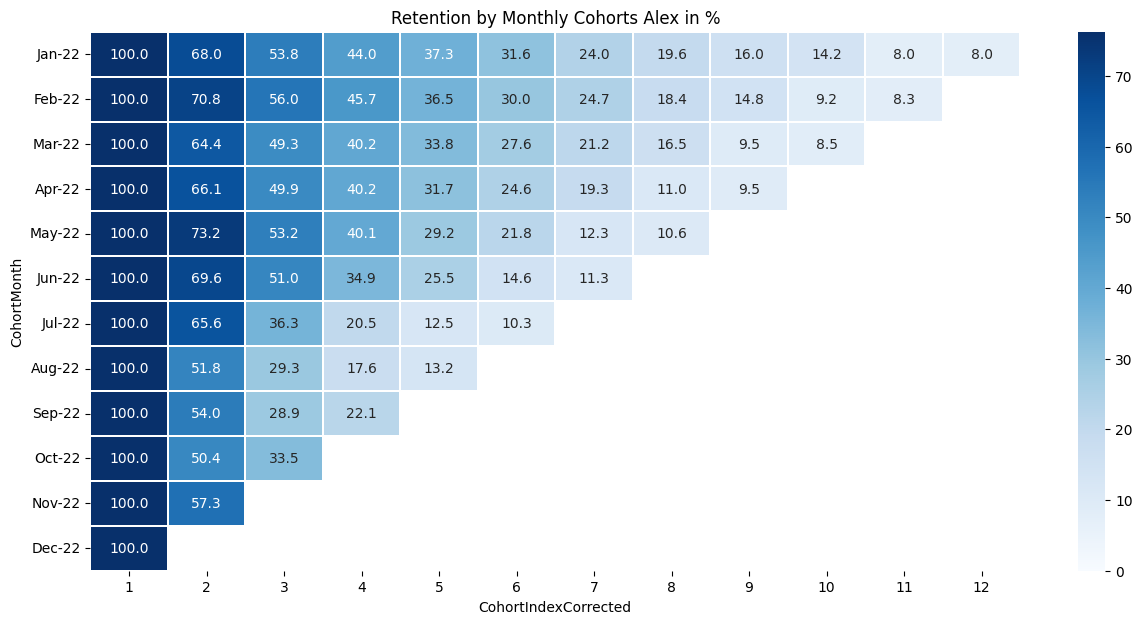

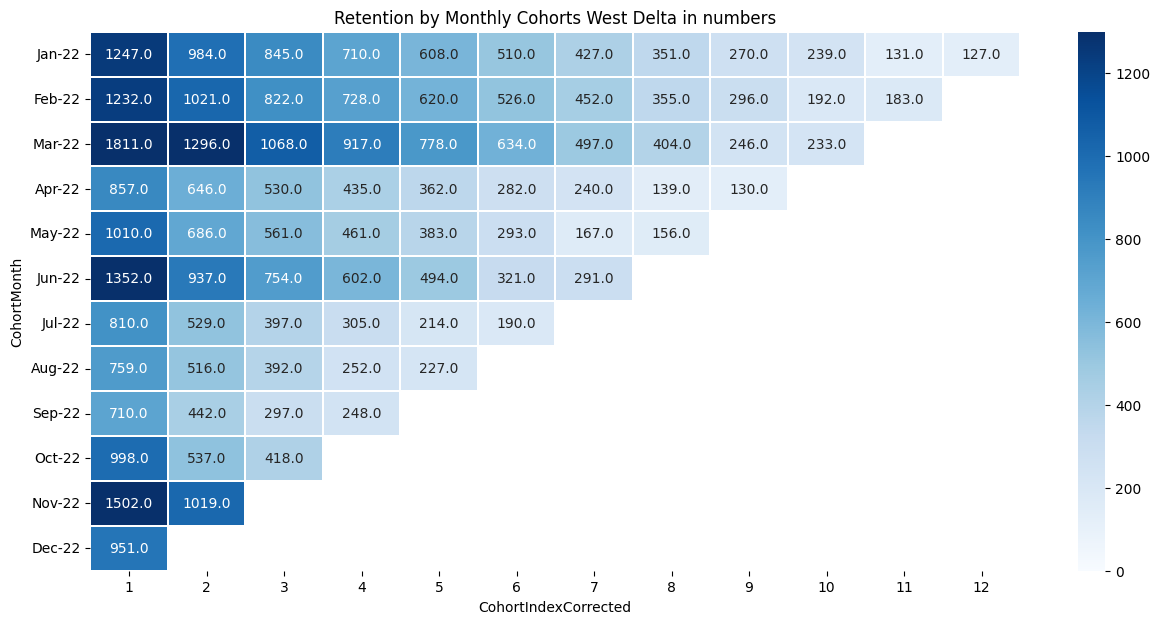

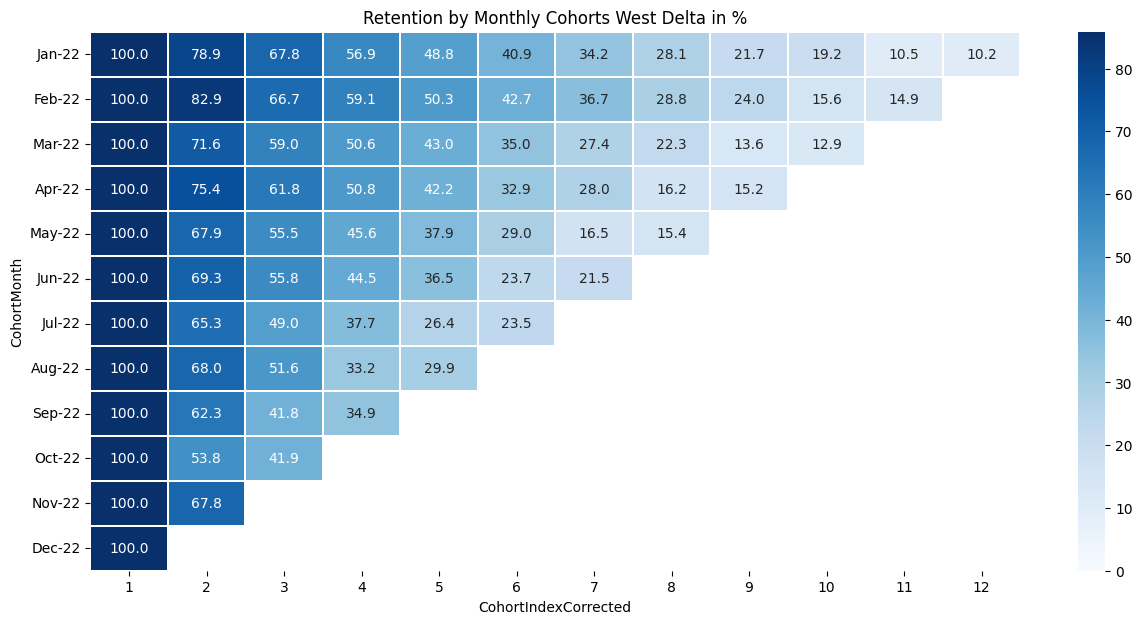

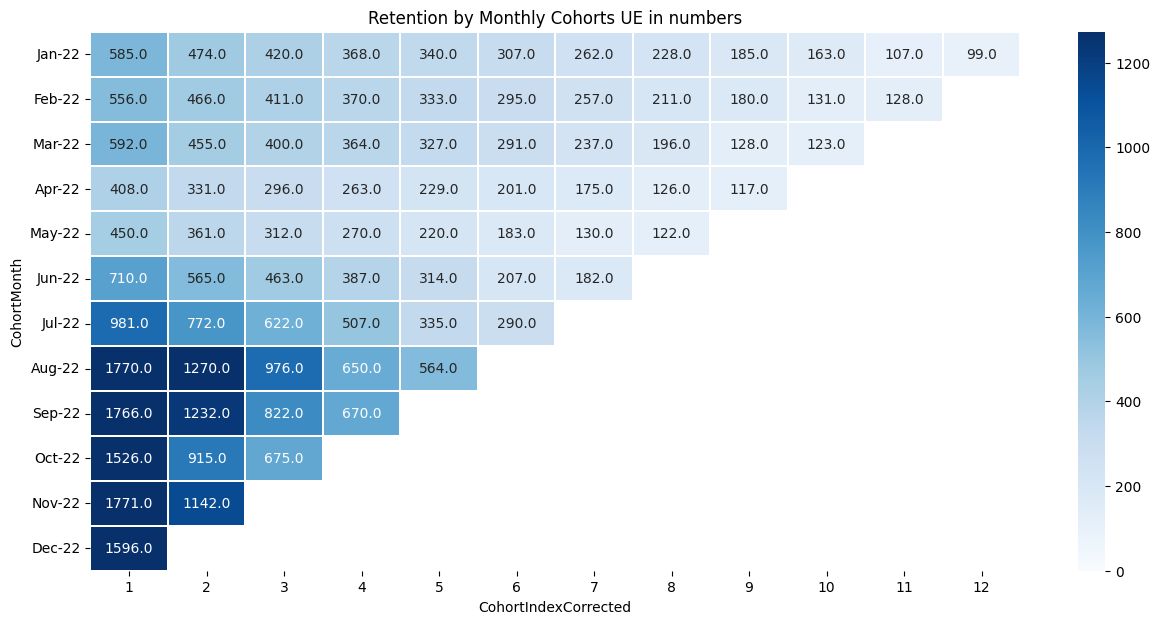

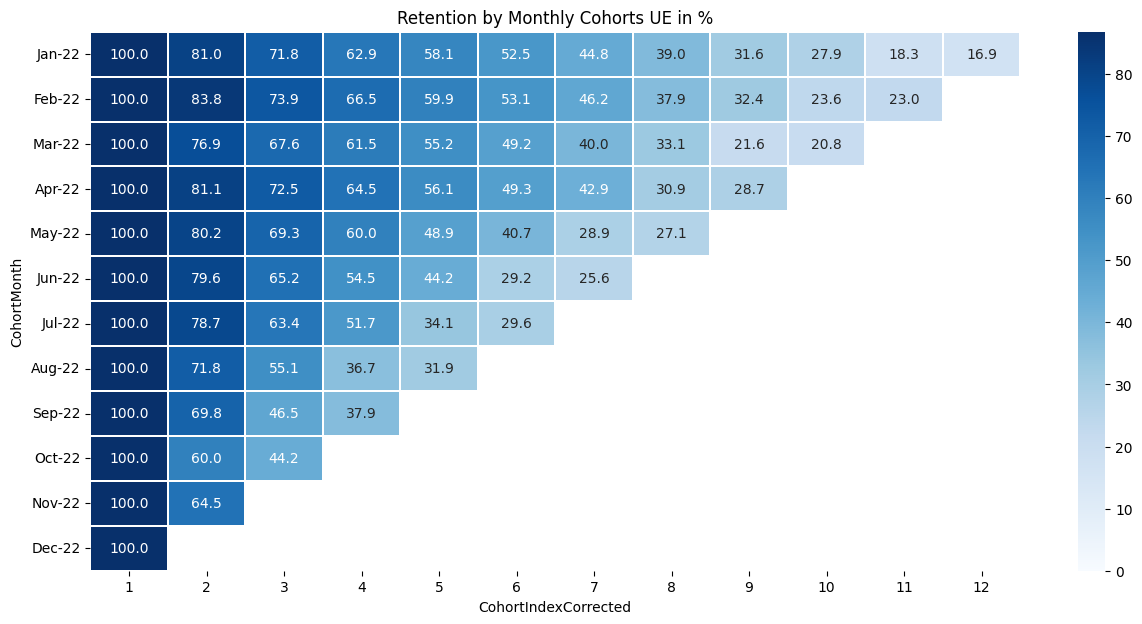

In [13]:
regions = df.name_ar.unique()

for region in regions:
    df_temp = df.loc[ df['name_ar'] == region ]
    
    grouping = df_temp.groupby(['CohortMonth', 'CohortIndexCorrected'])

    # Count the number of unique values per Customer ID

    cohort_data_temp = grouping['retailer_id'].apply(pd.Series.nunique).reset_index()

    # Create a pivot

    cohort_counts_temp = cohort_data_temp.pivot(index='CohortMonth', columns='CohortIndexCorrected', values='retailer_id')

    # Select the first column and store it to cohort_sizes

    cohort_sizes_temp = cohort_counts_temp.iloc[:,0]

    # Divide the cohort count by cohort sizes along the rows

    retention_temp = cohort_counts_temp.divide(cohort_sizes_temp, axis=0)*100
    
    # Create list of month names for visualisation

    month_list_temp = retention_temp.reset_index()['CohortMonth']

    def get_month_name(x):
       return dt.strftime(x, '%b-%y')

    month_list_temp = month_list_temp.apply(get_month_name)

    # Initialize inches plot figure

    fig, ax = plt.subplots(figsize=(15,7))

    # Add a title

    plt.title(f'Retention by Monthly Cohorts {region} in numbers')

    # Create the heatmap

    sns.heatmap(data=cohort_counts_temp,
    ax = ax,
    annot = True,
    cmap = "Blues",
    vmin = 0.0,
    vmax = list(cohort_counts_temp.max().sort_values(ascending = False))[1]+3,
    fmt = '.1f',
    linewidth = 0.3,
    yticklabels=month_list_temp)
    
    fig2, ax2 = plt.subplots(figsize=(15,7))
    
    sns.heatmap(data=retention_temp,
    ax = ax2,
    annot = True,
    cmap = "Blues",
    vmin = 0.0,
    vmax = list(retention_temp.max().sort_values(ascending = False))[1]+3,
    fmt = '.1f',
    linewidth = 0.3,
    yticklabels=month_list)
    plt.title(f'Retention by Monthly Cohorts {region} in %')
    plt.show()

## Saving The results to Excel (each region seperately in a sheet, all in one workbook)

In [14]:
writer = pd.ExcelWriter("Acquisition Journey for 2022.xlsx", engine = 'xlsxwriter')
retention.to_excel(writer , sheet_name = "All Regions Perc")
cohort_counts.to_excel(writer, sheet_name = "All Regions Retention")
for region in regions:
    
    df_temp = df.loc[ df['name_ar'] == region ]
    
    grouping = df_temp.groupby(['CohortMonth', 'CohortIndexCorrected'])

    # Count the number of unique values per Customer ID

    cohort_data_temp = grouping['retailer_id'].apply(pd.Series.nunique).reset_index()

    # Create a pivot

    cohort_counts_temp = cohort_data_temp.pivot(index='CohortMonth', columns='CohortIndexCorrected', values='retailer_id')

    # Select the first column and store it to cohort_sizes

    cohort_sizes_temp = cohort_counts_temp.iloc[:,0]

    # Divide the cohort count by cohort sizes along the rows

    retention_temp = cohort_counts_temp.divide(cohort_sizes, axis=0)*100
    
    
    
    retention_temp.to_excel(writer, sheet_name = f"{region}'s percentages")
    cohort_counts_temp.to_excel(writer, sheet_name = f"{region}'s numbers")

writer.close()

In [15]:
retention

CohortIndexCorrected,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2022-01-01,100.0,75.378242,62.806196,52.125360,45.028818,38.544669,32.636888,27.485591,22.010086,18.984150,12.481988,11.833573
2022-02-01,100.0,76.691056,62.042706,52.112886,44.363148,37.240555,31.133343,24.921607,20.591310,13.901747,12.975959,NaN
2022-03-01,100.0,68.944699,54.684859,45.629075,37.985994,31.695243,25.561459,21.190534,13.583675,12.545279,NaN,NaN
2022-04-01,100.0,70.029951,55.540996,45.263946,37.345563,29.745414,24.466492,16.117559,14.619993,NaN,NaN,NaN
2022-05-01,100.0,69.138756,53.073243,42.528524,34.026500,25.984542,16.617593,14.924549,NaN,NaN,NaN,NaN
2022-06-01,100.0,69.796120,54.554423,42.897073,34.413022,22.114436,19.269977,NaN,NaN,NaN,NaN,NaN
2022-07-01,100.0,68.339768,50.335298,37.695590,25.116846,21.479374,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,100.0,64.486844,45.006924,29.204493,24.588398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01,100.0,64.453273,42.811199,34.165721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Frequencies of orders per region per month

In [16]:
import numpy as np
print("Consistent Frequencies\n")
for region in df_consistent['name_ar'].unique():
    df_consistent_temp = df_consistent.loc[df_consistent['name_ar'] == region]
    for mon in np.sort(df_consistent_temp['months'].unique()):
        df_consistent_temp_months = df_consistent_temp.loc[df_consistent_temp['months'] == mon]
        consistent_retailers_n = df_consistent_temp_months['retailer_id'].nunique()
        consistent_orders_n = df_consistent_temp_months['order_id'].nunique()
        consistent_frequency = consistent_orders_n / consistent_retailers_n
        print(f"{region}'s {mon} cosistent details: number of orders is {consistent_orders_n} , number of retailers is {consistent_retailers_n} , frequency is {consistent_frequency} " )
    print("---------------------------------------------------------------------------------------------------------------------")
    print("---------------------------------------------------------------------------------------------------------------------")

Consistent Frequencies

Cairo's 1 cosistent details: number of orders is 1059 , number of retailers is 297 , frequency is 3.5656565656565657 
Cairo's 2 cosistent details: number of orders is 2589 , number of retailers is 630 , frequency is 4.109523809523809 
Cairo's 3 cosistent details: number of orders is 5826 , number of retailers is 1032 , frequency is 5.645348837209302 
Cairo's 4 cosistent details: number of orders is 7476 , number of retailers is 1346 , frequency is 5.554234769687964 
Cairo's 5 cosistent details: number of orders is 8526 , number of retailers is 1703 , frequency is 5.006459189665296 
Cairo's 6 cosistent details: number of orders is 9654 , number of retailers is 2028 , frequency is 4.760355029585799 
Cairo's 7 cosistent details: number of orders is 10362 , number of retailers is 2372 , frequency is 4.3684654300168635 
Cairo's 8 cosistent details: number of orders is 13352 , number of retailers is 2800 , frequency is 4.768571428571429 
Cairo's 9 cosistent details: n

No Region's 3 cosistent details: number of orders is 21 , number of retailers is 7 , frequency is 3.0 
No Region's 4 cosistent details: number of orders is 50 , number of retailers is 10 , frequency is 5.0 
No Region's 5 cosistent details: number of orders is 74 , number of retailers is 13 , frequency is 5.6923076923076925 
No Region's 6 cosistent details: number of orders is 66 , number of retailers is 18 , frequency is 3.6666666666666665 
No Region's 7 cosistent details: number of orders is 47 , number of retailers is 22 , frequency is 2.1363636363636362 
No Region's 8 cosistent details: number of orders is 59 , number of retailers is 34 , frequency is 1.7352941176470589 
No Region's 9 cosistent details: number of orders is 76 , number of retailers is 45 , frequency is 1.6888888888888889 
No Region's 10 cosistent details: number of orders is 98 , number of retailers is 50 , frequency is 1.96 
No Region's 11 cosistent details: number of orders is 153 , number of retailers is 69 , freq

In [17]:
print("Inconsistent Frequencies\n")
for region in df_inconsistent['name_ar'].unique():
    df_inconsistent_temp = df_inconsistent.loc[df_inconsistent['name_ar'] == region]
    for mon in np.sort(df_inconsistent_temp['months'].unique()):
        df_inconsistent_temp_months = df_inconsistent_temp.loc[df_inconsistent_temp['months'] == mon]
        inconsistent_retailers_n = df_inconsistent_temp_months['retailer_id'].nunique()
        inconsistent_orders_n = df_inconsistent_temp_months['order_id'].nunique()
        inconsistent_frequency = inconsistent_orders_n / inconsistent_retailers_n
        print(f"{region}'s {mon} incosistent details: number of orders is {inconsistent_orders_n} , number of retailers is {inconsistent_retailers_n} , frequency is {inconsistent_frequency} " )
    print("---------------------------------------------------------------------------------------------------------------------")
    print("---------------------------------------------------------------------------------------------------------------------")

Inconsistent Frequencies

Cairo's 1 incosistent details: number of orders is 4017 , number of retailers is 2401 , frequency is 1.6730528946272387 
Cairo's 2 incosistent details: number of orders is 7538 , number of retailers is 4024 , frequency is 1.8732604373757455 
Cairo's 3 incosistent details: number of orders is 13383 , number of retailers is 5758 , frequency is 2.324244529350469 
Cairo's 4 incosistent details: number of orders is 13477 , number of retailers is 5680 , frequency is 2.372711267605634 
Cairo's 5 incosistent details: number of orders is 14046 , number of retailers is 6749 , frequency is 2.081197214402134 
Cairo's 6 incosistent details: number of orders is 12830 , number of retailers is 6817 , frequency is 1.8820595569898781 
Cairo's 7 incosistent details: number of orders is 11313 , number of retailers is 6003 , frequency is 1.8845577211394302 
Cairo's 8 incosistent details: number of orders is 13125 , number of retailers is 6861 , frequency is 1.9129864451246175 
Cai

## Is it the channel?
### As noticed, The inconsistent part of our acquired base has a quite larger number of orders with the telesales and admin channel, Which means they do not use the app that much!

In [18]:
print("\n",df_consistent['channel'].value_counts())
print("\n",df_inconsistent['channel'].value_counts())
print(f"\nThe most selling channel with (consistent retailers) is the {df_consistent['channel'].value_counts().index[0]} Channel with a percentage hold of {df_consistent['channel'].value_counts(normalize = True)[0] * 100}") 
print(f"\nThe most selling channel with (inconsistent retailers) is the {df_inconsistent['channel'].value_counts().index[0]} Channel with a percentage hold of {df_inconsistent['channel'].value_counts(normalize = True)[0] * 100}") 


 retailer     340342
telesales     34431
admin           265
Name: channel, dtype: int64

 retailer     262009
telesales     79970
admin          1929
Name: channel, dtype: int64

The most selling channel with (consistent retailers) is the retailer Channel with a percentage hold of 90.7486708013588

The most selling channel with (inconsistent retailers) is the retailer Channel with a percentage hold of 76.18578224408854


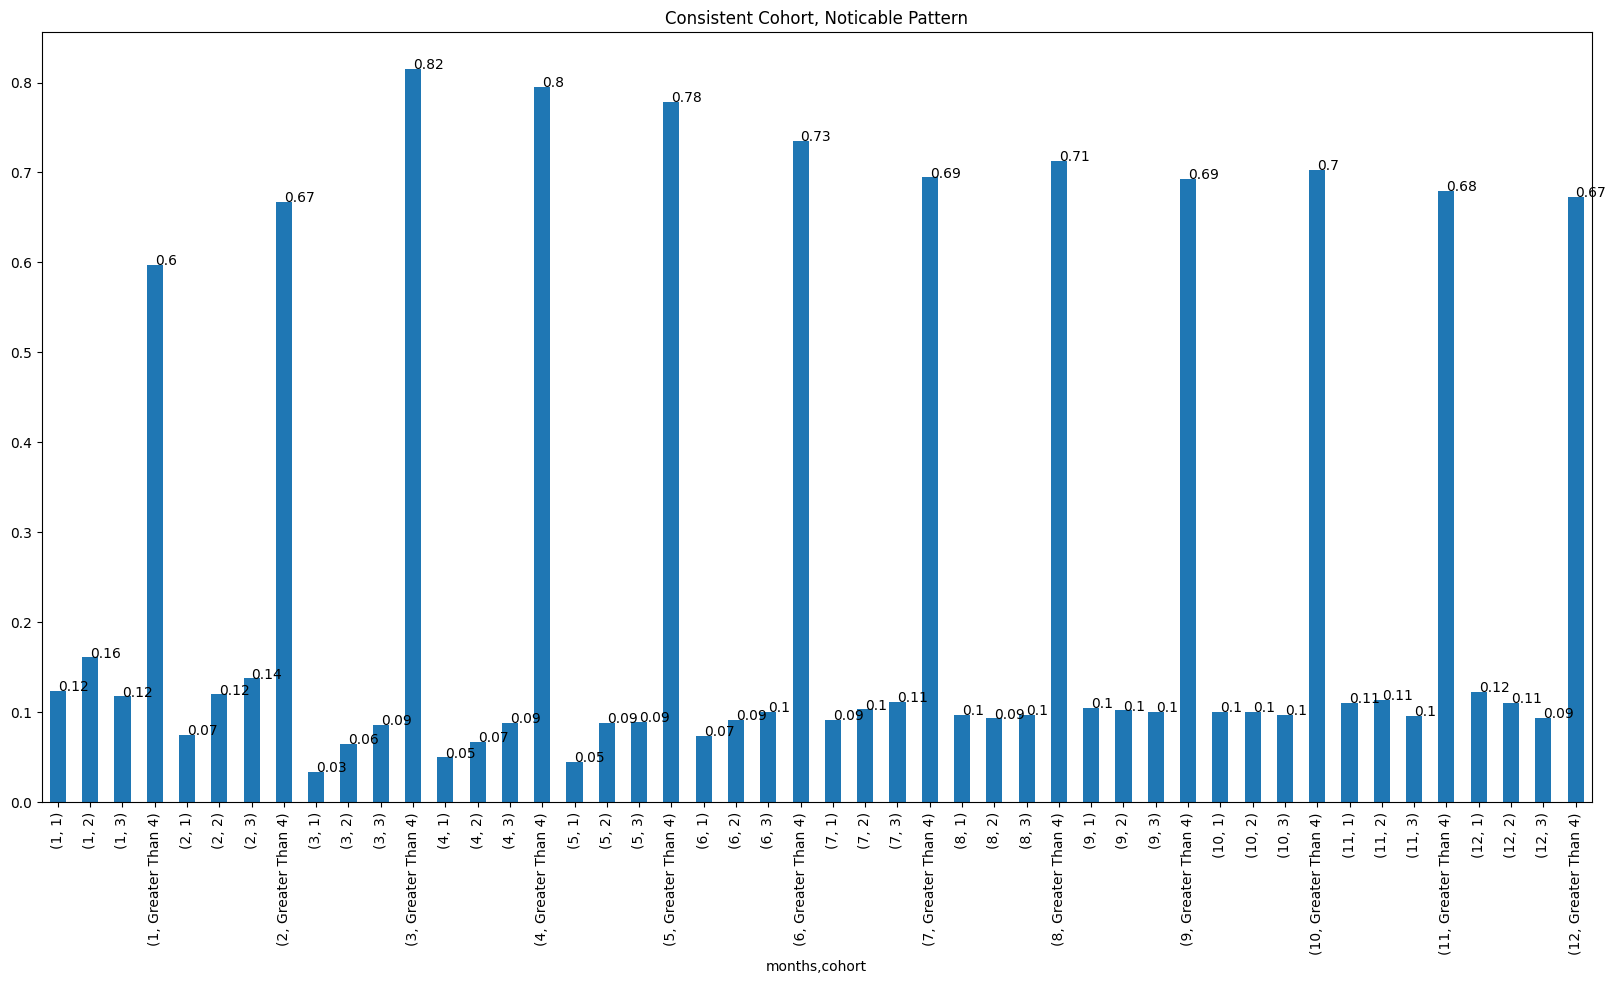

In [19]:
import matplotlib.pyplot as plt
consistent_group = df_consistent.groupby(['retailer_id','months'])['order_id'].nunique().to_frame(name = "n_orders")
consistent_group = consistent_group.reset_index()
def get_cohort(x):
    if x >= 4:
        return "Greater Than 4"
    else:
        return x
consistent_group['cohort'] = consistent_group['n_orders'].apply(lambda x : get_cohort(x))
consistent_group = consistent_group.groupby(['months','cohort'])['n_orders'].sum()/consistent_group.groupby('months')['n_orders'].sum()
consistent_group.plot(kind='bar',figsize = (20,10), title = "Consistent Cohort, Noticable Pattern")
for i,val in enumerate(consistent_group.values):
    plt.text(i,val,f"{np.round(val,2)}")


## How often do you buy?

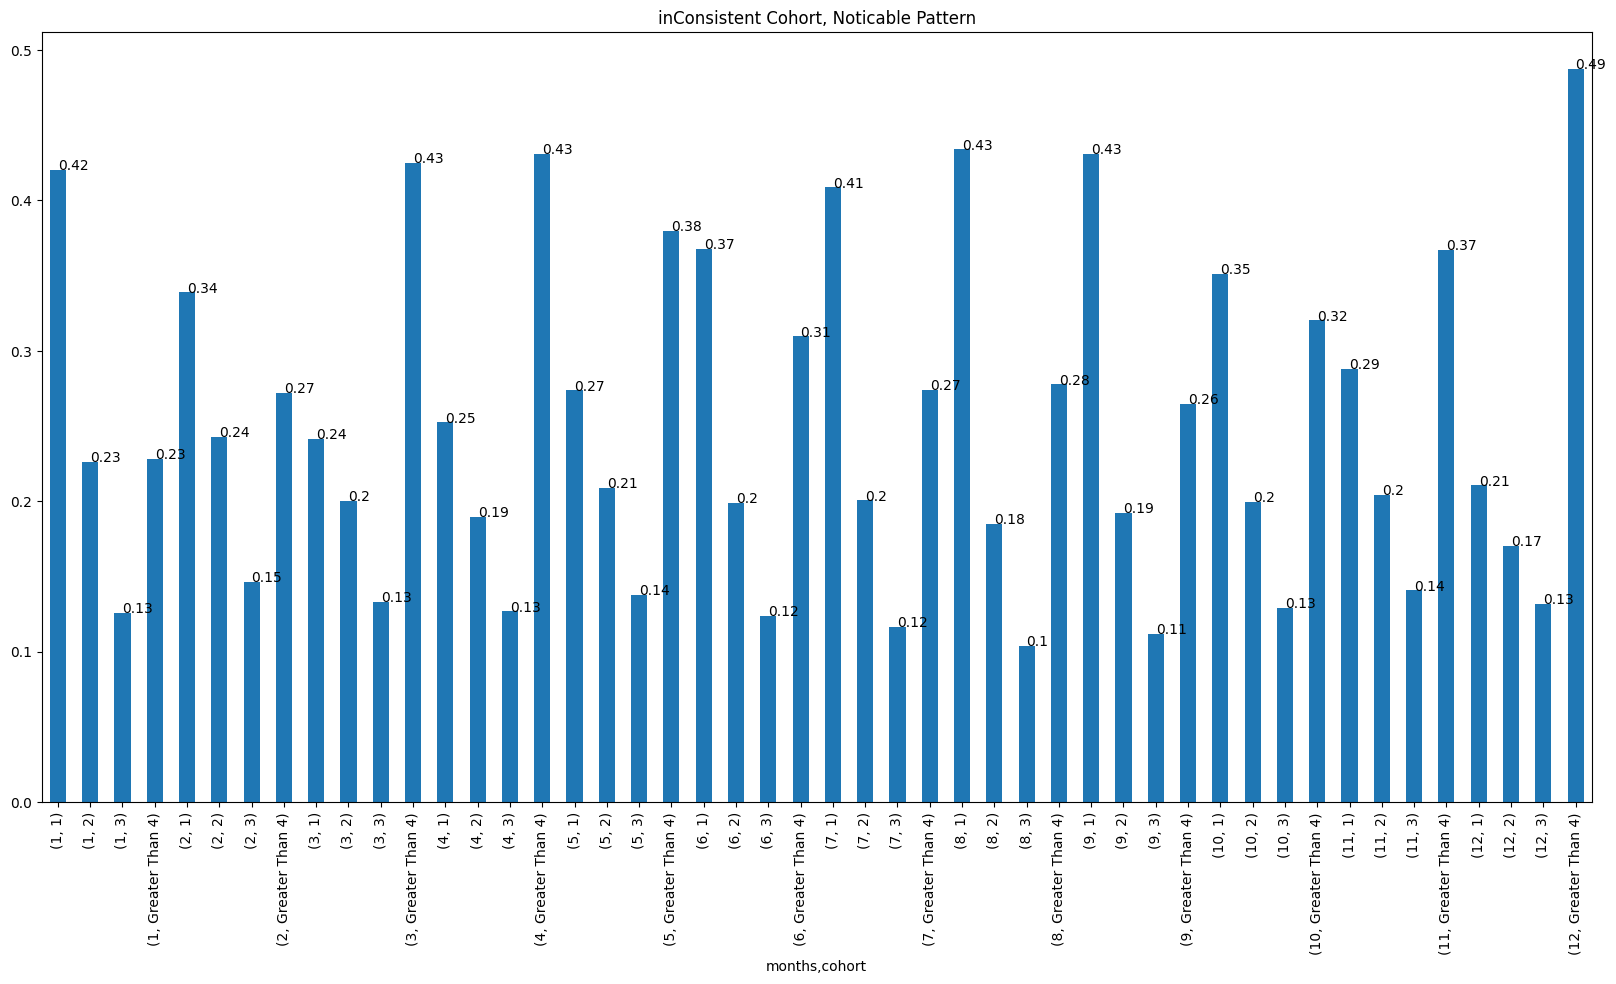

In [20]:
import matplotlib.pyplot as plt
inconsistent_group = df_inconsistent.groupby(['retailer_id','months'])['order_id'].nunique().to_frame(name = "n_orders")
inconsistent_group = inconsistent_group.reset_index()

def get_cohort(x):
    if x >= 4:
        return "Greater Than 4"
    else:
        return x
inconsistent_group['cohort'] = inconsistent_group['n_orders'].apply(lambda x : get_cohort(x))
inconsistent_group = inconsistent_group.groupby(['months','cohort'])['n_orders'].sum()/inconsistent_group.groupby('months')['n_orders'].sum()
inconsistent_group.plot(kind='bar',figsize = (20,10), title = "inConsistent Cohort, Noticable Pattern")
for i,val in enumerate(inconsistent_group.values):
    plt.text(i,val,f"{np.round(val,2)}")

months  cohort        
1       1                   237
        2                   308
        3                   225
        Greater Than 4     1143
2       1                   400
        2                   640
        3                   735
        Greater Than 4     3565
3       1                   429
        2                   822
        3                  1095
        Greater Than 4    10357
4       1                   766
        2                  1038
        3                  1353
        Greater Than 4    12268
5       1                   838
        2                  1632
        3                  1656
        Greater Than 4    14472
6       1                  1531
        2                  1912
        3                  2100
        Greater Than 4    15359
7       1                  2071
        2                  2342
        3                  2520
        Greater Than 4    15769
8       1                  2819
        2                  2710
        3        

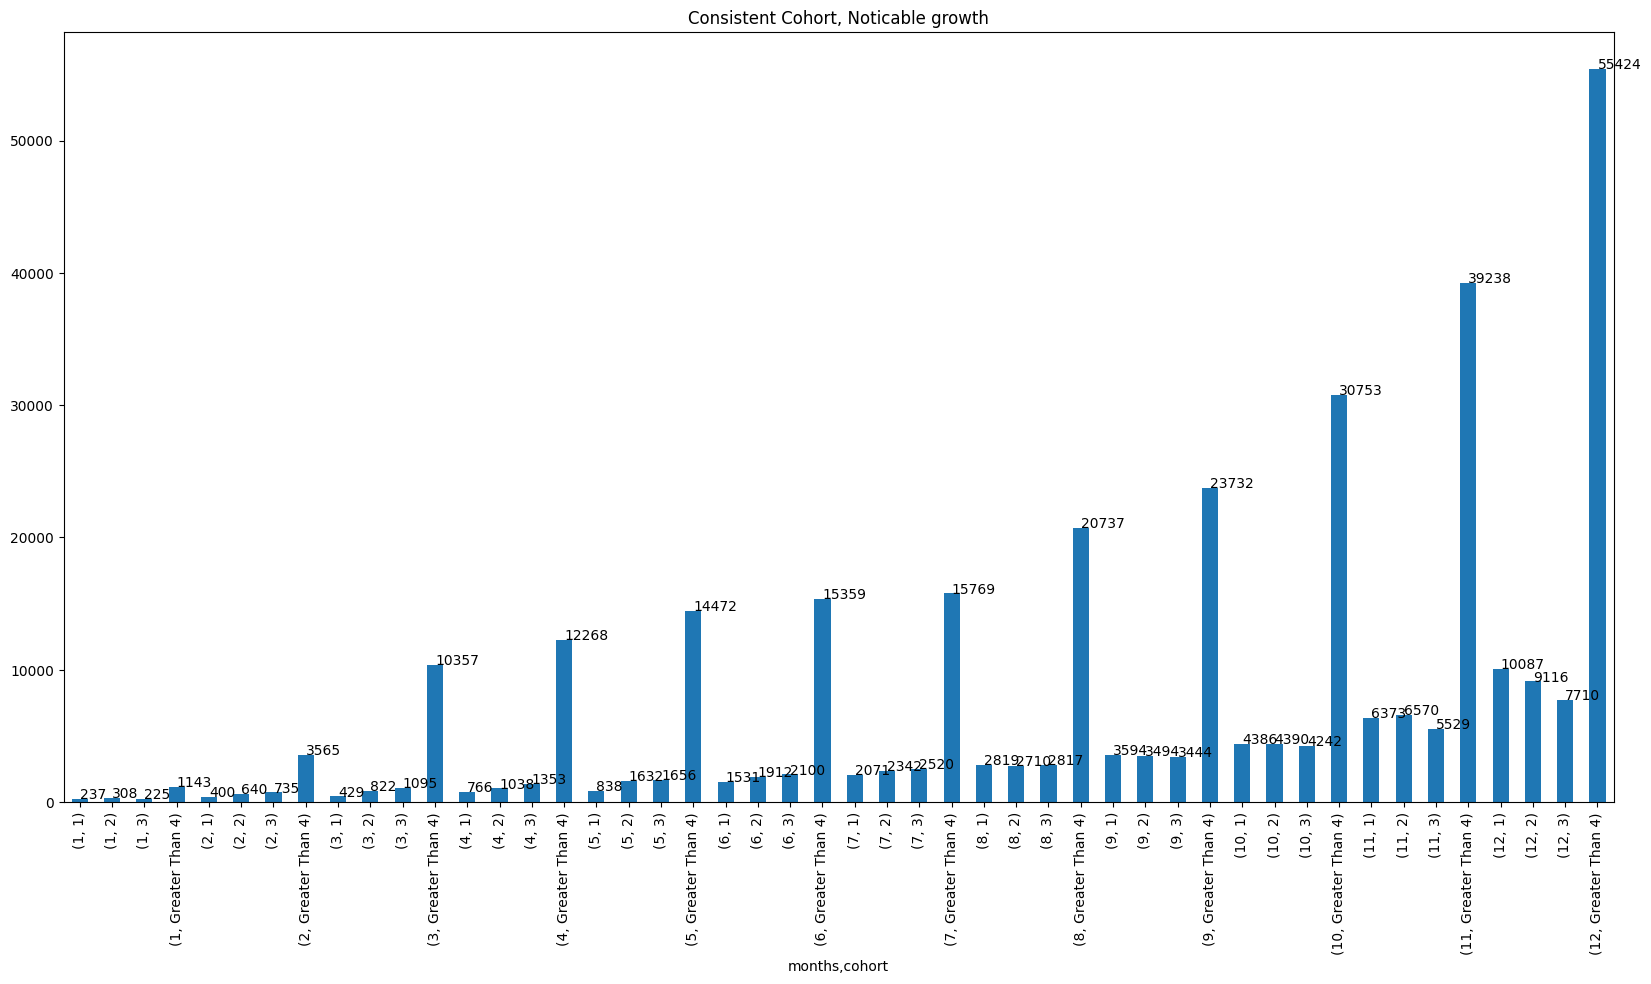

In [21]:
import matplotlib.pyplot as plt
consistent_group = df_consistent.groupby(['retailer_id','months'])['order_id'].nunique().to_frame(name = "n_orders")
consistent_group = consistent_group.reset_index()

def get_cohort(x):
    if x >= 4:
        return "Greater Than 4"
    else:
        return x
consistent_group['cohort'] = consistent_group['n_orders'].apply(lambda x : get_cohort(x))
consistent_group = consistent_group.groupby(['months','cohort'])['n_orders'].sum()
consistent_group.plot(kind='bar',figsize = (20,10), title = "Consistent Cohort, Noticable growth")
for i,val in enumerate(consistent_group.values):
    plt.text(i,val,f"{val}")

print(consistent_group)

C:\Users\ismail.awad_maxab\AppData\Local\Temp\ipykernel_5848\472775866.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(consistent_orders_totals.values[consistent_orders_totals.values <= 10000],ax = ax)


25 of our customers spend 1019.75 or less per order
50 of our customers spend 1548.21 or less per order
75 of our customers spend 2600.0 or less per order
90 of our customers spend 4271.507500000002 or less per order


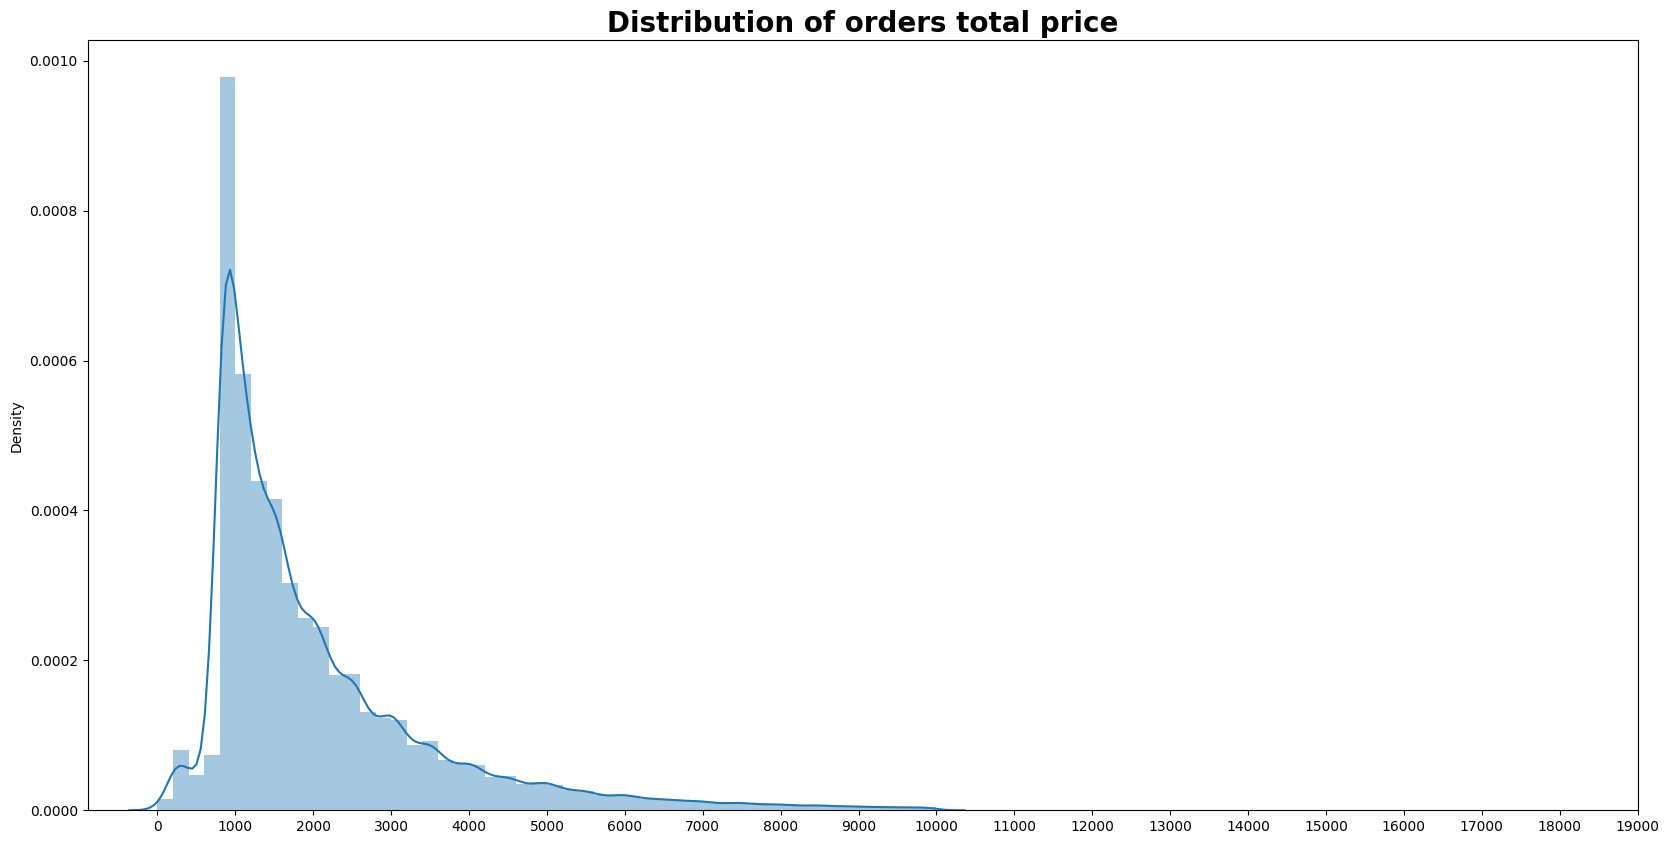

In [46]:
import seaborn as sns
fig , ax = plt.subplots(figsize = (20,10))

consistent_orders_totals = df_consistent.groupby('order_id')['total_price'].sum()
sns.distplot(consistent_orders_totals.values[consistent_orders_totals.values <= 10000],ax = ax)
plt.xticks(np.arange(0,20000 , 1000))
plt.title("Distribution of orders total price",fontweight = "bold",fontsize = 20)
percentiles = [25,50,75,90]
for i , total in enumerate(np.percentile(consistent_orders_totals.values , percentiles)):
    print(f"{percentiles[i]} of our customers spend {total} or less per order")

In [50]:
regions = np.sort(df_consistent['name_ar'].unique())

for region in regions:
    df_temp = df_consistent.loc[df_consistent['name_ar']==region]
    nmv = df_temp['total_price'].sum() / df_temp['order_id'].nunique()
    print(f"{region}'s NMV per consistent retailer is {nmv}")

Alex's NMV per consistent retailer is 1916.8713913142576
Cairo's NMV per consistent retailer is 2423.0437547637484
East Delta's NMV per consistent retailer is 2155.9130509591273
No Region's NMV per consistent retailer is 2096.8879846510717
UE's NMV per consistent retailer is 2043.0442215059284
West Delta's NMV per consistent retailer is 2088.161293356079


In [51]:
regions = np.sort(df_inconsistent['name_ar'].unique())

for region in regions:
    df_temp = df_inconsistent.loc[df_inconsistent['name_ar']==region]
    nmv = df_temp['total_price'].sum() / df_temp['order_id'].nunique()
    print(f"{region}'s NMV per inconsistent retailer is {nmv}")

Alex's NMV per inconsistent retailer is 1582.9408447732098
Cairo's NMV per inconsistent retailer is 2123.416397237773
East Delta's NMV per inconsistent retailer is 1738.3562617941739
No Region's NMV per inconsistent retailer is 2830.509428140459
UE's NMV per inconsistent retailer is 1648.467293970258
West Delta's NMV per inconsistent retailer is 1664.8999001212883


In [55]:
df.head() #adjust the logic later to get the status of each retailer (onboarding, onboard, organic)

,retailer_id,created_at,total_price,channel,name_ar,order_id,OrderMonth,CohortMonth,first_order_month,months,last_month_of_the_year,working_months,consistency,CohortIndex,CohortIndexCorrected,retailer_status
0,104,2022-05-26 22:36:46,2320.0,telesales,Cairo,2448646,2022-05-01,2022-05-01,5,5,12,2,0.25,1,1,onboarding
1,104,2022-07-04 12:01:33,3360.0,telesales,Cairo,2654523,2022-07-01,2022-05-01,5,7,12,2,0.25,3,1,onboarding
2,137,2022-06-06 10:47:17,2475.0,telesales,Cairo,2501042,2022-06-01,2022-06-01,6,6,12,7,1.00,1,1,onboarding
3,137,2022-06-27 16:07:16,160.5,telesales,Cairo,2616244,2022-06-01,2022-06-01,6,6,12,7,1.00,1,1,onboarding
4,137,2022-06-27 16:07:16,91.5,telesales,Cairo,2616244,2022-06-01,2022-06-01,6,6,12,7,1.00,1,1,onboarding
